**DATA DESCRIPRION**

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines.

The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.

The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points.
The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)


In [4]:

df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx', sheet_name='Sheet1')

In [5]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.info()
df.describe(include='all')

df['DOL'].describe()

print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


In [9]:
df['Designation'].nunique()
df['JobCity'].nunique()
df['CollegeCityID'].nunique()
df['CollegeID'].nunique()
df['Degree'].unique()
sorted(df['CollegeTier'].unique())
sorted(df['CollegeCityTier'].unique())
df['Specialization'].nunique()
df['Specialization'].describe()
df['Specialization'].unique()
df['CollegeState'].nunique()
df['Gender'].unique()
gy_list = sorted(df['GraduationYear'].unique())

In [10]:
df = df.drop(['ID'], axis=1)
df

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


**UNIVARIATE ANALYSIS:**

In [11]:
num_males = df['Gender'].where(df['Gender'] == 'm').count()
num_females = df['Gender'].where(df['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))


Number of male candidates : 3041
Number of female candidates : 957
Male to Female ratio: 3.18


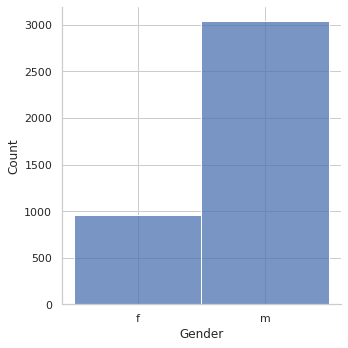

In [12]:
sns.displot(df["Gender"])
plt.show()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

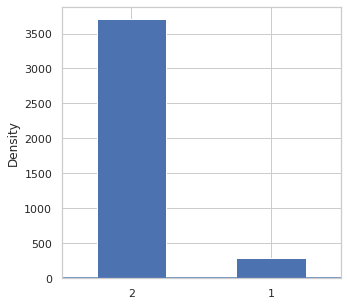

In [13]:
df['CollegeTier'].value_counts().plot(kind='kde', figsize=(5,5))
df['CollegeTier'].value_counts()
df['CollegeTier'].value_counts().plot(kind='bar', figsize=(5,5))
df['CollegeCityTier'].value_counts().plot(kind='kde', figsize=(5,5))
df['CollegeCityTier'].value_counts()

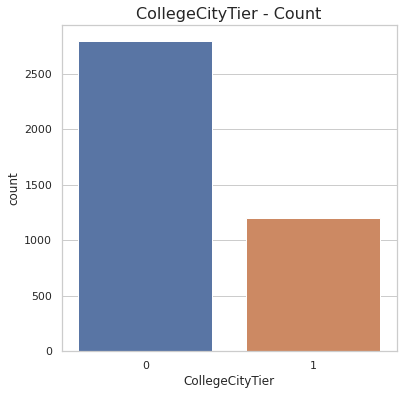

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
s = sns.countplot(data=df, x='CollegeCityTier')

s.set_title("CollegeCityTier - Count", fontsize=16)
plt.show()


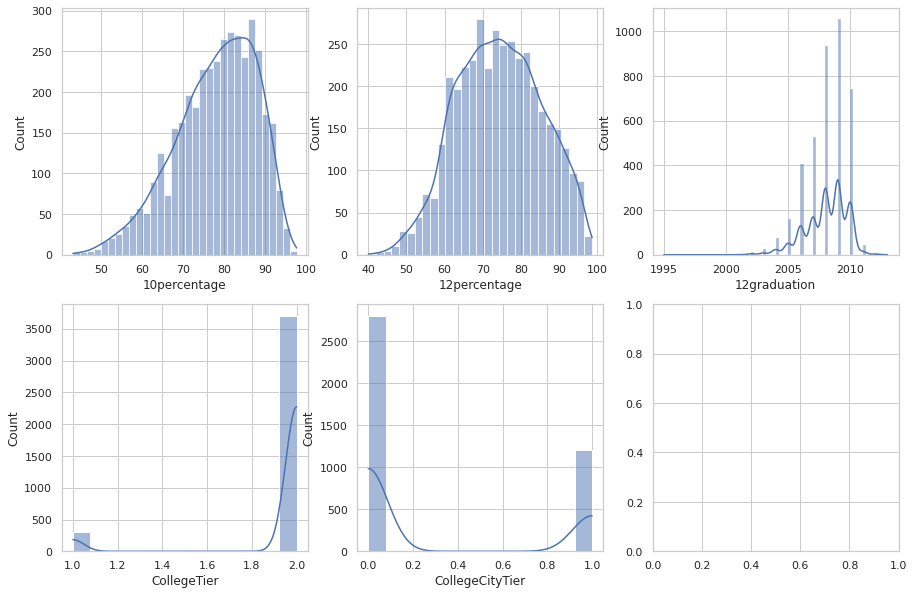

In [15]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.subplots_adjust()

sns.histplot(data=df, x="10percentage", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="12percentage", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="12graduation", kde=True, ax=axis[0,2])
sns.histplot(data=df, x="CollegeTier", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="CollegeCityTier", kde=True, ax=axis[1,1])

plt.show()


In [16]:
df['12graduation'].value_counts().sort_values(ascending=False)
df['collegeGPA'].value_counts().sort_values(ascending=False)
df['12board'].value_counts().sort_values(ascending=False)
df['JobCity'].value_counts().sort_values(ascending=False)


Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Yamuna Nagar          1
manesar               1
Jalandhar             1
PATNA                 1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

**DETECTING OUTLIERS BY USING BOXPLOT**

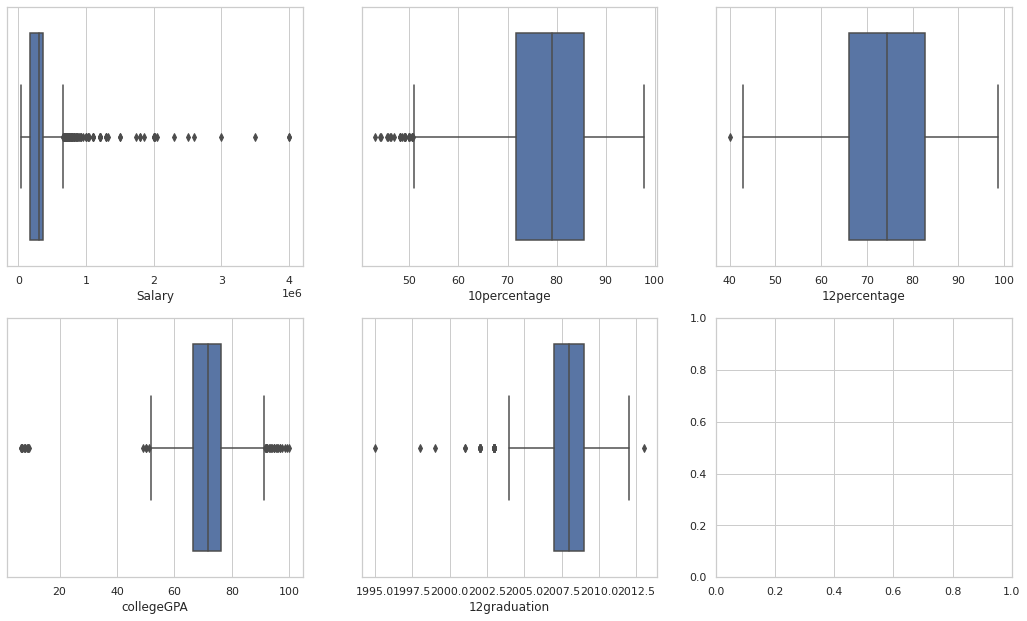

In [17]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=2.5,bottom = 1.84)

sns.boxplot(data=df, x="Salary", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="10percentage", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="12percentage", orient='h', ax=axis[0,2])
sns.boxplot(data=df, x="collegeGPA", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="12graduation", orient='h', ax=axis[1,1])
plt.show()


In [18]:
df1 = df[['Gender', '12graduation', 'Degree']].melt()
df1
df2 = df1.groupby(['variable', 'value'])[['value']].count()
df2
df2 / len(df)

value
variable     value                  
12graduation 1995           0.000250
             1998           0.000250
             1999           0.000250
             2001           0.000500
             2002           0.003502
             2003           0.006253
             2004           0.018259
             2005           0.040020
             2006           0.101801
             2007           0.132066
             2008           0.233867
             2009           0.263132
             2010           0.185593
             2011           0.011506
             2012           0.002501
             2013           0.000250
Degree       B.Tech/B.E.    0.925463
             M.Sc. (Tech.)  0.000500
             M.Tech./M.E.   0.013257
             MCA            0.060780
Gender       f              0.239370
             m              0.760630

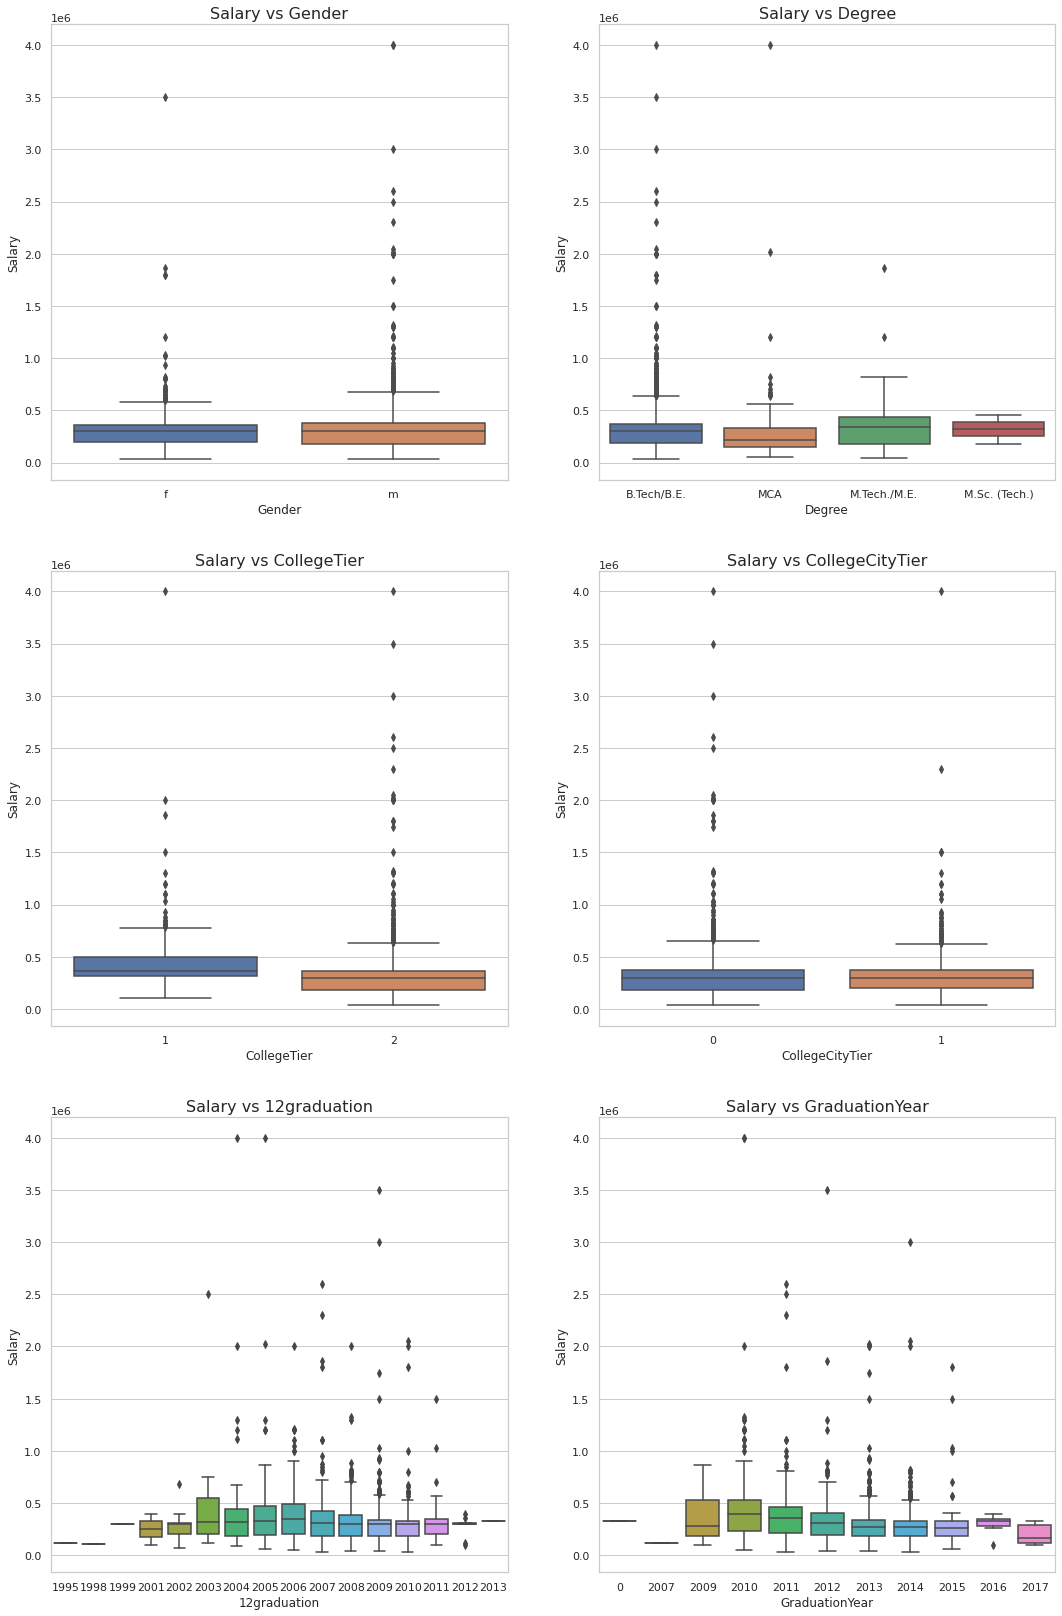

In [19]:
attributes = ['Gender','Degree','CollegeTier','CollegeCityTier','12graduation','GraduationYear']
sns.set_style('whitegrid')
fig , axes = plt.subplots(nrows = 3 , ncols = 2 , figsize = (18,20))
fig.subplots_adjust(top = 1.2)
count = 0

for i in range(3):
    for j in range(2):
        sns.boxplot(data = df , y = 'Salary' , x = attributes[count] , ax = axes[i,j])
        axes[i,j].set_title(f"Salary vs {attributes[count]}", fontsize=16)
        count += 1

**Observations :** 
>> Salary vs Gender :
    Salaries for Male and Female have the Same Salary Median Values.
    Maximum Salary for Males seems to be higher than those for Females.
    Male Salary have more Outliers than Female Salary.

>> Salary vs Degree :
    Salaries for M.Tech and M.Sc(Tech) Students have the Same Salary Median  Values.B.Tech Degree have the highest number of Outliers than the rest of the Degrees.Salary Range for M.Tech Students is greater than those of B.Tech Students.
    
>>Salary vs CollegeTier :
    Salary Range for Tier 1 Colleges is greater than Tier 2 Colleges.
    Tier 2 Colleges have more Outliers than Tier 1 Colleges.
    
>>Salary vs CollegeCityTier :
    Salary Range for Tier 0 Cities is slightly greater than Tier 1 Cities.
    Tier 0 Cities have more Outliers than Tier 1 Cities.
    Salary for Tier 0 and Tier 1 College Cities have the same Salary Median Values.

>> Salary vs 12graduation :
    Off all the years considered , Salary Range for the Year 2006 is the largest.
    Salary Median Values for Years 2003 , 2004 , 2005 , 2007 , 2008 , 2009 , 2010 and 2011 are the Same.
    
>>Salary vs GraduationYear :
    Off all the years considered , Salary Range for the Year 2010 is the largest.
    Salary Median Values for Years 2009 , 2013 , 2014 and 2015 are the Same.

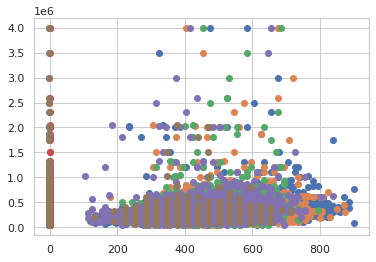

In [20]:
plt.scatter(x='Quant', y='Salary', data = df)


# In[45]:


plt.scatter(x='English' , y='Salary', data = df)
plt.scatter(x='Logical' , y='Salary', data = df)
plt.scatter(x='Domain' , y='Salary', data = df)
plt.scatter(x='ComputerProgramming' , y='Salary', data = df)
plt.scatter(x='ComputerScience' , y='Salary', data = df)


**CORREALATION** **BETWEEN PARAMETERS**

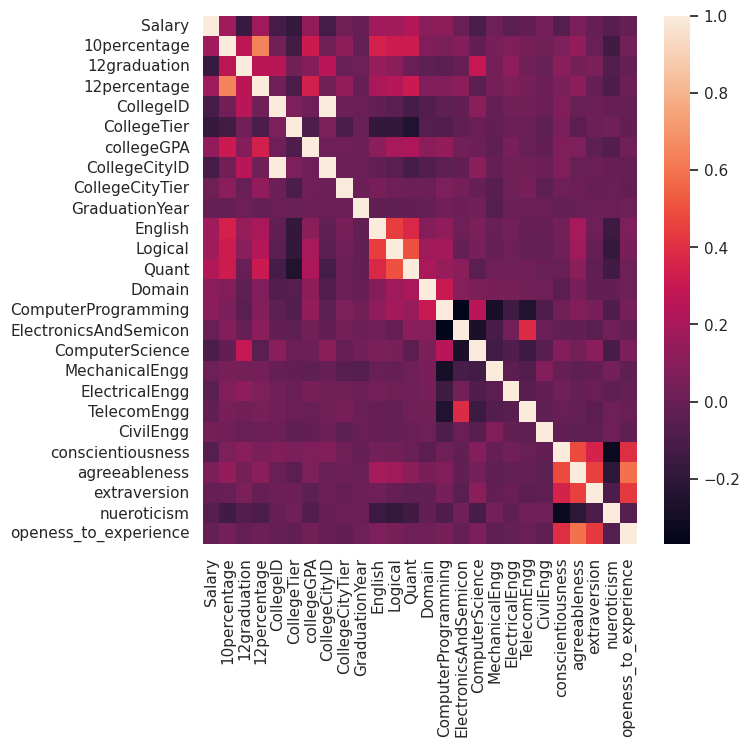

In [21]:
dc = df.corr()
dc
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(dc)


**UNIVRIATE ANALYSIS ON CHATEGORICAL VALUES:**

In [22]:
df.groupby(['Designation']).sum()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Designation,,,,,,,,,,,,,,,,,,,,,,,,,,
.net developer,7595000,2522.97,68275,2488.43,206410,67,2409.15,206410,15,68434,15443,16429,15344,17.513628,13131,1488,4679,-34,-34,546,-34,2.3366,6.4034,-0.4143,-8.89607,-6.3643
.net web developer,785000,284.50,8032,285.00,28671,7,298.94,28671,0,8054,1880,1955,1930,1.715959,1740,-4,659,-4,-4,-4,-4,-2.4635,-0.7430,1.0714,3.27980,-1.4612
account executive,1150000,310.86,8030,270.16,7936,8,279.78,7936,0,8046,2045,1885,1820,0.659757,838,630,-4,-4,-4,624,-4,-1.1238,-2.6954,0.1306,-2.19050,-2.7620
account manager,350000,85.00,2009,76.00,9699,2,71.00,9699,1,2013,570,520,430,0.819417,505,-1,-1,-1,-1,-1,-1,1.5644,1.2114,0.6248,0.39950,0.8637
admin assistant,205000,160.00,4017,127.00,3005,4,129.00,3005,1,4026,955,1015,1035,1.512991,940,-2,468,-2,-2,-2,-2,0.2402,0.6457,-0.9785,0.20820,-1.1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web designer and seo,200000,90.60,2010,78.80,6874,2,79.57,6874,0,2015,830,455,545,0.884123,535,-1,-1,-1,-1,-1,-1,0.5591,0.8784,0.7785,-1.37530,0.4805
web developer,9125000,3858.12,108441,3668.53,268064,106,3612.75,268064,12,108693,25230,26089,26320,22.942269,21700,2072,8564,-54,-54,180,-54,-8.4563,6.5095,7.2896,-13.55721,-4.5658
web intern,205000,88.80,2008,70.20,16673,2,71.00,16673,0,2013,455,555,405,0.842248,445,-1,469,-1,-1,-1,-1,1.1336,0.0459,0.3174,-1.88240,-0.0943


In [23]:
freq_table=df.groupby(['Designation']).size().reset_index(name='Count')
freq_table

,Designation,Count
0,.net developer,34
1,.net web developer,4
2,account executive,4
3,account manager,1
4,admin assistant,2
...,...,...
414,web designer and seo,1
415,web developer,54
416,web intern,1
417,website developer/tester,1


In [24]:
df.groupby(['JobCity']).sum() 

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
JobCity,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,139830000,35839.18,925742,34274.96,2476597,877,33141.30,2476597,141,927862,238843,239389,245220,255.175459,174116,39307,41797,8417,7390,11128,467,3.9833,88.8122,11.7275,-54.74755,-43.8928
Chennai,335000,82.90,2005,91.50,6609,2,88.20,6609,1,2012,505,605,445,0.124502,-1,233,-1,-1,-1,-1,-1,-1.6538,0.5008,-0.9245,-0.29027,-0.7615
Delhi,360000,54.00,2009,49.00,11759,2,62.00,11759,0,2013,510,390,265,0.216785,325,-1,-1,-1,-1,-1,-1,-1.1128,-0.5913,-1.2148,2.73560,0.3444
Mumbai,290000,129.67,4016,130.08,7831,4,120.00,7831,0,4023,920,785,820,-2.000000,-2,833,-2,-2,472,-2,-2,1.6217,0.7656,-0.3340,-0.88650,1.0165
Pune,180000,70.00,2008,68.67,7495,2,56.36,7495,0,2012,415,535,425,0.714529,-1,-1,-1,435,-1,-1,-1,1.7852,1.9048,1.3977,0.26790,-0.6035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trivandrum,565000,168.40,4019,162.20,25659,4,150.41,25659,0,4027,1295,1200,1035,1.181075,1060,451,314,-2,-2,-2,-2,0.5437,1.1665,1.5290,-1.60970,0.1945
udaipur,220000,155.83,4013,158.00,10100,4,153.00,10100,0,4023,890,750,1030,1.192438,870,-2,-2,-2,-2,-2,-2,1.0201,2.0936,1.6342,-0.46300,-1.3650
vapi,180000,75.66,2009,76.66,4415,2,76.50,4415,1,2014,510,525,545,0.966007,395,-1,-1,-1,580,-1,-1,-1.7389,-2.1186,-1.2196,-0.48790,-1.6273


In [25]:
freq_table=df.groupby(['JobCity']).size().reset_index(name='Count')
freq_table.iloc[1: , :]

,JobCity,Count
1,Chennai,1
2,Delhi,1
3,Mumbai,2
4,Pune,1
5,ariyalur,1
...,...,...
334,trivandrum,2
335,udaipur,2
336,vapi,1
337,vizag,1


In [26]:
df.groupby(['Gender']).count()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957,957
m,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041


In [27]:
df.groupby(['10board']).sum()
df.groupby(['12board']).sum()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
12board,,,,,,,,,,,,,,,,,,,,,,,,,,
0,135555000,27951.04,720432,26816.43,1300100,700,25628.29,1300100,110,722078,168704,171173,177516,179.185983,123249,34154,2375,9328,-359,11330,844,-74.0242,36.4838,-49.1467,12.48134,-68.6528
board of intermediate,325000,172.80,4019,185.20,8661,4,155.90,8661,1,4029,870,980,885,-0.274016,570,199,-2,437,451,-2,-2,-0.4617,-1.5732,-1.0559,-0.34200,0.7695
upboard,150000,60.66,2008,62.40,9738,2,69.30,9738,0,2013,370,410,470,0.755375,315,-1,-1,446,-1,-1,-1,-2.2351,-2.6847,-2.6028,0.39950,-5.4770
ahsec,450000,72.16,2006,57.80,3683,2,63.96,3683,0,2011,455,525,415,0.525923,415,-1,-1,-1,-1,-1,-1,0.3555,0.0328,-0.0537,-0.76030,0.3444
aissce,165000,76.40,2009,66.20,3802,2,68.60,3802,0,2013,425,335,555,0.229482,-1,266,-1,-1,-1,-1,-1,-1.4992,-1.3713,-1.5051,-0.05520,-2.0648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
west bengal board of higher secondary education,250000,83.50,2008,63.50,9786,2,74.00,9786,0,2012,395,505,435,0.538387,-1,333,-1,-1,-1,-1,-1,-1.3447,-1.3713,-1.4688,0.64980,-0.6035
west bengal council of higher secondary education,1865000,367.47,10038,355.19,27132,10,374.10,27132,3,10061,2254,2505,2540,3.358712,2365,-5,434,-5,-5,-5,-5,-5.4481,1.2559,-4.0058,1.42776,-0.6082
west bengal council of higher secondary eucation,365000,85.62,2008,81.00,11166,2,85.70,11166,0,2013,475,605,650,0.538387,-1,333,-1,-1,-1,-1,-1,0.8463,0.2124,1.0859,-0.99500,0.8637


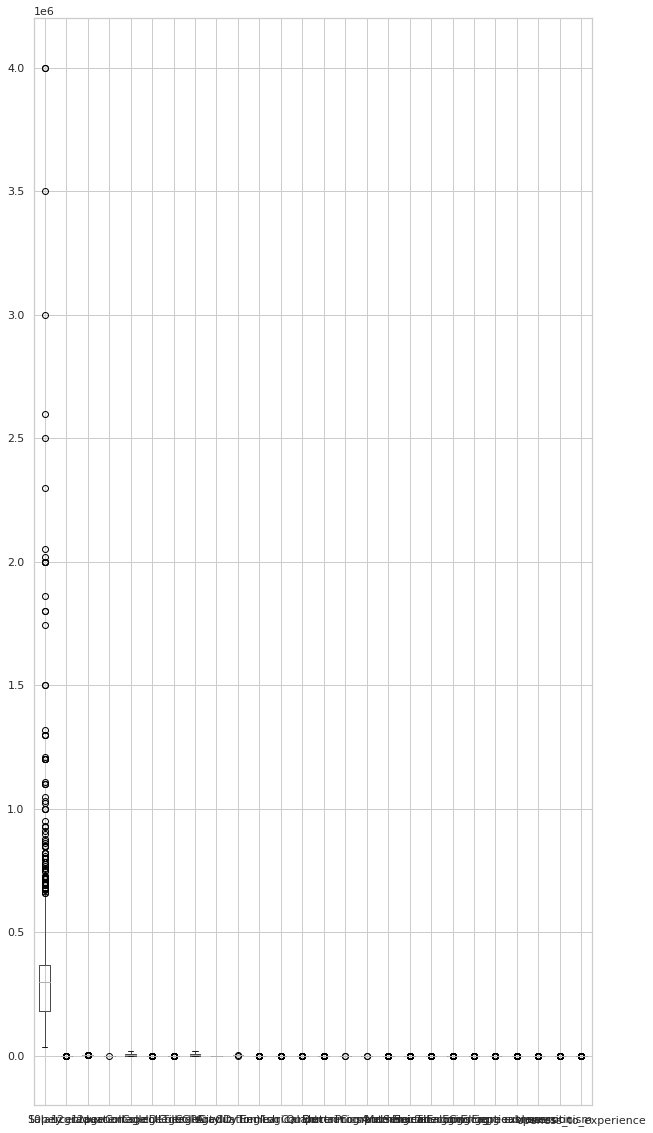

In [29]:
df.boxplot(figsize=(10,20))

If we oberve the above the data and figure we can conclude that there are ouliers more in salary.

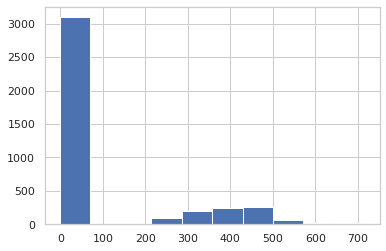

In [30]:
df['ComputerScience'].hist()

In [31]:
df.groupby(['ComputerScience','Designation']).sum()

Salary  10percentage  12graduation  \
ComputerScience Designation                                                     
-1              .net developer            5110000       1594.88         44162   
                .net web developer         420000        154.20          4014   
                account executive         1150000        310.86          8030   
                account manager            350000         85.00          2009   
                admin assistant            100000         80.00          2007   
...                                           ...           ...           ...   
 653            software developer        1075000        342.00          8039   
                software engineer          315000         72.00          2009   
 684            trainee engineer           350000         69.20          2008   
 715            junior software engineer   310000         95.00          2010   
                software engineer          325000         88.20          2010   

                                          12percentage  CollegeID  \
ComputerScience Designation                                         
-1              .net developer                 1583.93     115888   
                .net web developer              141.80      15544   
                account executive               270.16       7936   
                account manager                  76.00       9699   
                admin assistant                  65.00       2927   
...                                                ...        ...   
 653            software developer              341.20      24370   
                software engineer                68.40         51   
 684            trainee engineer                 77.40      12601   
 715            junior software engineer         89.00      10185   
                software engineer                80.80      15866   

                                          CollegeTier  collegeGPA  \
ComputerScience Designation                                         
-1              .net developer                     44     1565.79   
                .net web developer                  3      134.89   
                account executive                   8      279.78   
                account manager                     2       71.00   
                admin assistant                     2       68.00   
...                                               ...         ...   
 653            software developer                  6      315.50   
                software engineer                   2       67.84   
 684            trainee engineer                    2       76.72   
 715            junior software engineer            2       77.00   
                software engineer                   2       70.00   

                                          CollegeCityID  CollegeCityTier  \
ComputerScience Designation                                                
-1              .net developer                   115888               10   
                .net web developer                15544                0   
                account executive                  7936                0   
                account manager                    9699                1   
                admin assistant                    2927                1   
...                                                 ...              ...   
 653            software developer                24370                2   
                software engineer                    51                0   
 684            trainee engineer                  12601                1   
 715            junior software engineer          10185                0   
                software engineer                 15866                0   

                                          GraduationYear  English  Logical  \
ComputerScience Designation                                                  
-1              .net developer                  

In [32]:
freq_table=df.groupby(['ComputerScience','Designation']).size().reset_index(name='Count')
freq_table

freq_table=df.groupby(['ComputerScience','Designation']).size().reset_index(name='Count')
freq_table.max()

ComputerScience                              715
Designation        windows systems administrator
Count                                        395
dtype: object

In [33]:
freq_table=df.groupby(['ComputerScience','Designation']).size().reset_index(name='Count')
sorted=freq_table.sort_values(by='Count')
sorted.iloc[-1]

ComputerScience                   -1
Designation        software engineer
Count                            395
Name: 324, dtype: object

In [34]:
freq_table=df.groupby(['ComputerScience','Designation']).size().reset_index(name='Count')
sorted=freq_table.sort_values(by='Count')
sorted.iloc[-2]

ComputerScience                    -1
Designation        software developer
Count                             175
Name: 320, dtype: object

In [35]:
freq_table=df.groupby(['ComputerScience','Designation']).size().reset_index(name='Count')
sorted=freq_table.sort_values(by='Count')
sorted.iloc[-3]

ComputerScience                 -1
Designation        system engineer
Count                          170
Name: 347, dtype: object

In [36]:
df.groupby(['Gender','Specialization']).size()

Gender  Specialization                         
f       aeronautical engineering                    1
        applied electronics and instrumentation     2
        biomedical engineering                      2
        biotechnology                               9
        chemical engineering                        1
                                                   ..
m       metallurgical engineering                   2
        other                                      13
        polymer technology                          1
        power systems and automation                1
        telecommunication engineering               5
Length: 71, dtype: int64

In [37]:
d=df.groupby(['Gender','Specialization'])
dd=pd.DataFrame(d)

d=df.groupby(['Gender','Specialization']).size().reset_index(name='Count')
dd=pd.DataFrame(d)
dd



,Gender,Specialization,Count
0,f,aeronautical engineering,1
1,f,applied electronics and instrumentation,2
2,f,biomedical engineering,2
3,f,biotechnology,9
4,f,chemical engineering,1
...,...,...,...
66,m,metallurgical engineering,2
67,m,other,13
68,m,polymer technology,1
69,m,power systems and automation,1





*-Most of the high paying jobs are from IT domain.
*-In 45% of top paying roles,men are generally paid higher compared to women. 
*-In 20% of top paying roles,women are paid higher than men.
*-In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
*-Junior manager is highest paying for men and field engineer is the highest paying role for women. 

 **Conclusion:**
* Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
* Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
* Software Engineer and Software Developer are the most aimed profession for amcat aspirants.





